# **Breast Cancer-SVM**

This breast cancer dataset contains features calculated from a scanned image of a fine needle aspiration (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.We will try in this work to create a classification model using SVM.

**Attribute Information:**

1) ID number

*  1) ID number

* 2) Diagnosis (M = malignant, B = benign)
*  3-32)

Ten real-valued features are computed for each cell nucleus:

* a)radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area

* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)

*   g) concavity (severity of concave portions of the contour)
*   h) concave points (number of concave portions of the contour)
*   i) symmetry
*   j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the data
df = pd.read_csv("https://raw.githubusercontent.com/FZ-hajji/test1/main/data.csv")

df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
df.shape

(569, 33)

In [3]:
#delete unused columns
df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
#change label M = malignant = 1 dan B = Benign = 0
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
m_data = df.loc[df['diagnosis'] == 1] 
b_data = df.loc[df['diagnosis'] == 0]

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Count the empty values in each column 
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#Share to test and train data
from sklearn.model_selection import train_test_split
x = df.iloc[:, 1:]
y = df['diagnosis'].tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n") 

**Linear Kernel SVM**

In [8]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(x_train, y_train)

print_score(model, x_train, y_train, x_test, y_test, train=True)
print_score(model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 77.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.621324  0.773626    0.810662      0.859349
recall       0.639860    1.000000  0.773626    0.819930      0.773626
f1-score     0.780384    0.766440  0.773626    0.773412      0.775205
support    286.000000  169.000000  0.773626  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[183 103]
 [  0 169]]

Test Result:
Accuracy Score: 81.58%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.671875  0.815789    0.835938      0.876234
recall      0.704225   1.000000  0.815789    0.852113      0.815789
f1-score    0.826446   0.803738  0.815789    0.815092      0.817881
support    71.000000  43.000000  0.815789  114.000000    114.000000
___

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


**Polynomial Kernel SVM**

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(x_train, y_train)

print_score(model, x_train, y_train, x_test, y_test, train=True)
print_score(model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.962712    0.987500  0.971429    0.975106      0.971919
recall       0.993007    0.934911  0.971429    0.963959      0.971429
f1-score     0.977625    0.960486  0.971429    0.969056      0.971259
support    286.000000  169.000000  0.971429  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[284   2]
 [ 11 158]]

Test Result:
Accuracy Score: 94.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.933333   0.974359  0.947368    0.953846      0.948808
recall      0.985915   0.883721  0.947368    0.934818      0.947368
f1-score    0.958904   0.926829  0.947368    0.942867      0.946806
support    71.000000  43.000000  0.947368  114.000000    114.000000
___

**Radial Kernel SVM**

In [10]:
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(x_train, y_train)

print_score(model, x_train, y_train, x_test, y_test, train=True)
print_score(model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 62.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.628571    0.0  0.628571    0.314286      0.395102
recall       1.000000    0.0  0.628571    0.500000      0.628571
f1-score     0.771930    0.0  0.628571    0.385965      0.485213
support    286.000000  169.0  0.628571  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[286   0]
 [169   0]]

Test Result:
Accuracy Score: 62.28%
_______________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy   macro avg  weighted avg
precision   0.622807   0.0  0.622807    0.311404      0.387889
recall      1.000000   0.0  0.622807    0.500000      0.622807
f1-score    0.767568   0.0  0.622807    0.383784      0.478046
support    71.000000  43.0  0.622807  114.000000    114.000000
_______________________________________________
Confu

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

To visualize our data we can use **PCA** for the reduction of the dimension

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
scaler = StandardScaler()
df=pca.fit_transform(df)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [12]:
df=pca.fit_transform(df)

Text(0, 0.5, 'Second Principal Component')

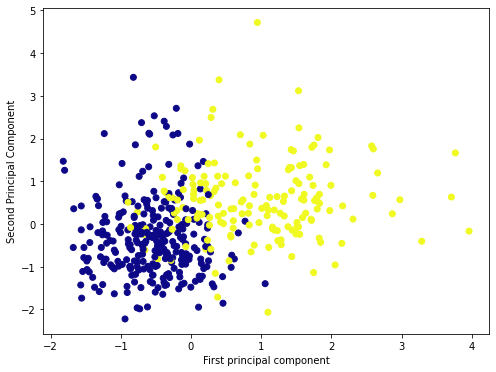

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

linear
Train Result:
Accuracy Score: 88.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.884868    0.887417  0.885714    0.886143      0.885815
recall       0.940559    0.792899  0.885714    0.866729      0.885714
f1-score     0.911864    0.837500  0.885714    0.874682      0.884243
support    286.000000  169.000000  0.885714  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[269  17]
 [ 35 134]]

Test Result:
Accuracy Score: 90.35%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.905405   0.900000  0.903509    0.902703      0.903367
recall      0.943662   0.837209  0.903509    0.890436      0.903509
f1-score    0.924138   0.867470  0.903509    0.895804      0.902763
support    71.000000  43.000000  0.903509  114.000000    114.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: No contour levels were found within the data range.


rbf
Train Result:
Accuracy Score: 90.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.909699    0.910256   0.90989    0.909978      0.909906
recall       0.951049    0.840237   0.90989    0.895643      0.909890
f1-score     0.929915    0.873846   0.90989    0.901880      0.909089
support    286.000000  169.000000   0.90989  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[272  14]
 [ 27 142]]

Test Result:
Accuracy Score: 90.35%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.928571   0.863636  0.903509    0.896104      0.904078
recall      0.915493   0.883721  0.903509    0.899607      0.903509
f1-score    0.921986   0.873563  0.903509    0.897775      0.903721
support    71.000000  43.000000  0.903509  114.000000    114.000000

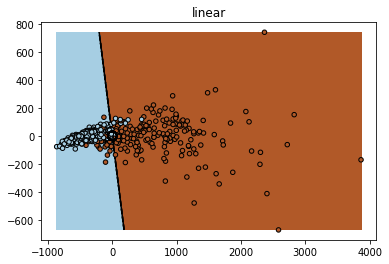

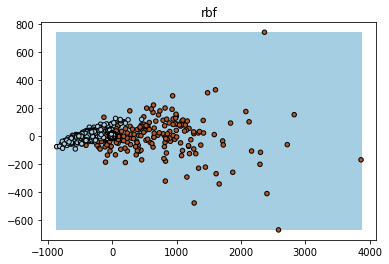

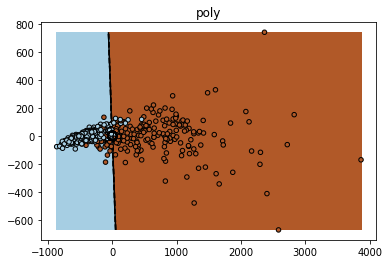

In [14]:
from sklearn import datasets, svm
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train[:,:2], y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        df[:, 0], df[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )
    plt.axis("tight")
    x_min = df[:, 0].min()
    x_max = df[:, 0].max()
    y_min = df[:, 1].min()
    y_max = df[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
    print(kernel)
    print_score(clf, X_train[:,:2], y_train, X_test[:,:2], y_test, train=True)
    print_score(clf, X_train[:,:2], y_train, X_test[:,:2], y_test, train=False)
plt.show()


**Tuning hyperparameters :**

**GridSearch**

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train[:,:2], y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train[:,:2], y_train)
print_score(svm_clf, X_train[:,:2], y_train, X_test[:,:2], y_test, train=True)
print_score(svm_clf, X_train[:,:2], y_train, X_test[:,:2], y_test, train=False)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best params: {'C': 0.5, 'gamma': 0.25, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 90.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901639    0.926667   0.90989    0.914153      0.910935
recall       0.961538    0.822485   0.90989    0.892012      0.909890
f1-score     0.930626    0.871473   0.90989    0.901050      0.908655
support    286.000000  169.000000   0.90989  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[275  11]
 [ 30 139]]

Test Result:
Accuracy Score: 91.23%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.929577   0.883721  0.912281    0.906649      0.912281
recall      0.929577   0.883721  0.912281    0.906649      0.912281
f1-score    0.929577 